Dataset shape: (1260, 7)
Actual price (last row):
            Date  Open Price   High Price    Low Price  Close Price  Adj Close Price    Volume
1259  2024-05-23      1020.0  1063.199951  1015.200012  1058.918579      1058.918579  53658481
Dataset without the last row (training data):
            Date  Open Price  High Price   Low Price  Close Price  Adj Close Price    Volume
1254  2024-05-16  949.099976  958.190002  941.030029   943.590027       943.590027  32395200
1255  2024-05-17  943.690002  947.400024  918.059998   924.789978       924.789978  35969100
1256  2024-05-20  937.500000  952.000000  934.400024   947.799988       947.799988  31876400
1257  2024-05-21  935.989990  954.000000  931.799988   953.859985       953.859985  32894600
1258  2024-05-22  954.590027  960.200012  932.489990   949.500000       949.500000  53725900
Days (independent variables):
 [[23], [24], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24

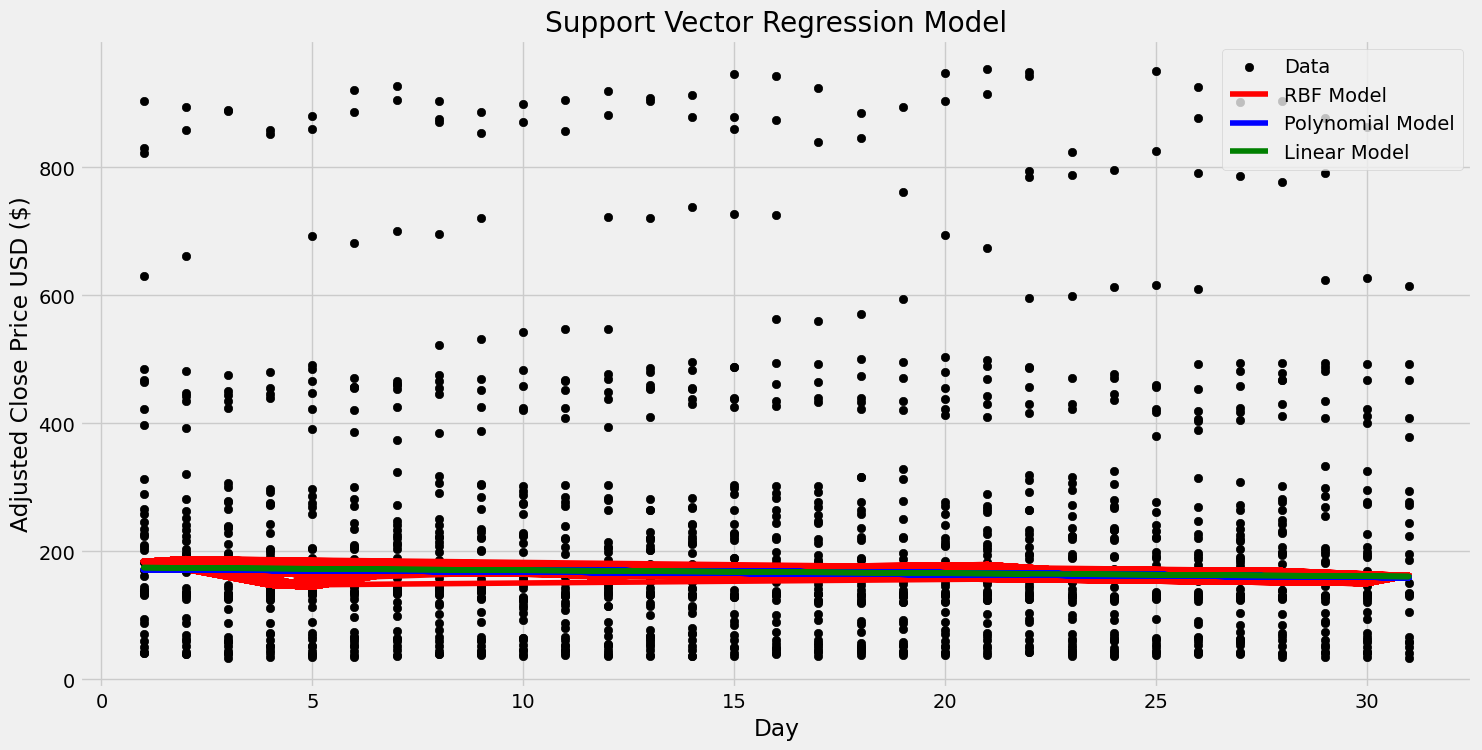

Predicted price by RBF SVR: $162.18
Predicted price by Polynomial SVR: $164.96
Predicted price by Linear SVR: $164.55
Actual price: $1058.92


In [30]:
"""Stock Price Prediction with SVR"""

# Description: This program predicts the price of NVDA stock for a specific day

# Import the required libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Load and display the dataset
df = pd.read_csv('NVDA.csv')

# Get the number of rows and columns
print(f"Dataset shape: {df.shape}")

# Show the last row of data (this is the price we will try to predict)
actual_price = df.tail(1)
print(f"Actual price (last row):\n{actual_price}")

# Prepare the data for training the SVR models
# Remove the last row (since we want to predict it)
df = df.head(len(df) - 1)
print("Dataset without the last row (training data):")
print(df.tail())

# Create empty lists to store the independent (days) and dependent (adj close prices) data
days = []
adj_close_prices = []

# Get the dates and adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close Price']

# Process the 'Date' column to extract the day of the month (assuming format is yyyy-mm-dd)
for day in df_days:
    days.append([int(day.split('-')[2])])  # Extract the day part from 'yyyy-mm-dd'

# Append adjusted close prices to the list
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

# Display the days and prices
print("Days (independent variables):\n", days)
print("Adjusted Close Prices (dependent variables):\n", adj_close_prices)

# Convert the lists into numpy arrays for the model
days = np.array(days)
adj_close_prices = np.array(adj_close_prices)

# Split data into training and testing sets (use the last row as the test set)
X_train = days
y_train = adj_close_prices

# Create and train SVR models (Linear, Polynomial, and RBF kernels)

# Initialize and train the SVR with the RBF kernel
svr_rbf = SVR(kernel='rbf', C=1000.0, gamma=0.15)
svr_rbf.fit(X_train, y_train)

# Initialize and train the SVR with the Polynomial kernel
svr_poly = SVR(kernel='poly', C=1000.0, degree=2)
svr_poly.fit(X_train, y_train)

# Initialize and train the SVR with the Linear kernel
svr_linear = SVR(kernel='linear', C=1000.0)
svr_linear.fit(X_train, y_train)

# Plot the models to see how well they fit
plt.figure(figsize=(16, 8))
plt.scatter(days, adj_close_prices, color='black', label='Data')

# Plot each SVR model
plt.plot(days, svr_rbf.predict(days), color='red', label='RBF Model')
plt.plot(days, svr_poly.predict(days), color='blue', label='Polynomial Model')
plt.plot(days, svr_linear.predict(days), color='green', label='Linear Model')

# Graph labels
plt.xlabel('Day')
plt.ylabel('Adjusted Close Price USD ($)')
plt.title('Support Vector Regression Model')
plt.legend()
plt.show()

# Predict the price for the last day (using all models)
day_to_predict = [[int(actual_price['Date'].values[0].split('-')[2])]]  # Last day from the actual price

# Print predictions
rbf_prediction = svr_rbf.predict(day_to_predict)
poly_prediction = svr_poly.predict(day_to_predict)
linear_prediction = svr_linear.predict(day_to_predict)

print(f"Predicted price by RBF SVR: ${rbf_prediction[0]:.2f}")
print(f"Predicted price by Polynomial SVR: ${poly_prediction[0]:.2f}")
print(f"Predicted price by Linear SVR: ${linear_prediction[0]:.2f}")

# Show the actual price of that day (for comparison)
print(f"Actual price: ${actual_price['Adj Close Price'].values[0]:.2f}")
